In [27]:
import pandas as pd
import numpy as np

In [28]:
pd.set_option('display.max_colwidth', None)

In [29]:
df = pd.read_excel('preprocessed_data.xlsx')

In [30]:
def relabel(row):
    if row['label'] in [1, 2]:
        return 'Tích cực'
    elif row['label'] in [3, 4]:
        return 'Trung tính'
    elif row['label'] in [0, 5]:
        return 'Tiêu cực'

# Áp dụng hàm gán nhãn mới cho từng dòng
df['new_label'] = df.apply(relabel, axis=1)
# Drop cột label cũ
# df.drop('label', axis=1, inplace=True)
# Hiển thị dữ liệu sau khi gán nhãn lại
df

,old_data,label,tranform_data,new_label
0,"sài tốt, pin ngon, máy mạnh, màn hình không thời thượng bằng s10, nhưng camera, mọi thứ là ngon quá sức mong đợi",1,sài tốt pin ngon máy mạnh màn_hình không thời_thượng bằng s10 nhưng camera mọi thứ là ngon quá_sức mong_đợi,Tích cực
1,"đẹp, nhiều chức năng bảo mật rất hay. mua dùm cho bà thím, bà rất ưng ý. ok",1,đẹp nhiều chức_năng bảo_mật rất hay mua dùm cho bà thím bà rất ưng_ý ok,Tích cực
2,"0 biết có phải do tương thích, mà máy ASUS X407 nhận nó rất cực, cho mỗi lần setup win mà phải install nó lại vào thiết bị bluetooth phải cả 30min mới nhận trong danh sách bluetooth. Nhận xong thì lúc tắt máy tính, lần sau nó còn đó, mà phải nhấn nút bluetooth vài lần, nó mới chạy lại. Win mình đang dùng bản 1809 bản quyền ASUS....",2,0 biết có phải do tương_thích mà máy asus x407 nhận nó rất cực cho mỗi lần setup win mà phải install nó lại vào thiết_bị bluetooth phải cả 30min mới nhận trong danh_sách bluetooth nhận xong thì lúc tắt máy_tính lần sau nó còn đó mà phải nhấn nút bluetooth vài lần nó mới chạy lại win mình đang dùng bản 1809 bản_quyền asus,Tích cực
3,0 sao \nbiết trước là sẽ hỏng trong 1 khoảng thời gian ngắn nhưng ai ngờ mới bóc hộp cắm sạc thử ngay thì sạc được số đen \nkhông có ý định đổi hoặc trả đâu chỉ nhắn và gọi thử thôi thì trả lời .\ngiờ để giá sách làm cảnh thôi,0,0 sao biết trước là sẽ hỏng trong 1 khoảng thời_gian ngắn nhưng ai_ngờ mới bóc hộp cắm sạc thử ngay thì sạc được số đen không có ý_định đổi hoặc trả đâu chỉ nhắn và gọi thử thôi_thì trả_lời giờ để giá sách làm cảnh thôi,Tiêu cực
4,1 bên không nghe được bao nhiêu dù đã chỉnh rồi sạc 5 phút nóng hỏi,0,1 bên không nghe được bao_nhiêu dù đã chỉnh rồi sạc 5 phút nóng hỏi,Tiêu cực
...,...,...,...,...
16827,"ừ thì tiền nào của nấy, rẻ thì không chất lượng như real rồi dây mỏng so sánh với dây gốc là thấy ngay, dùng cũng tạm được, đeo không thoải mái lắm, đóng gói cẩn thận giao hàng nhanh, tạm cho 4*",2,ừ thì tiền nào của nấy rẻ thì không chất_lượng như real rồi dây mỏng so_sánh với dây gốc là thấy ngay dùng cũng tạm được đeo không thoải_mái lắm đóng_gói cẩn_thận giao hàng nhanh tạm cho 4,Tích cực
16828,"Ừm....nói chung xài tốt, chơi game cũng được, chụp ảnh được, mỗi tội lướt tik tok 1 lúc rồi tự out, còn lại đều được",0,ừm nói_chung xài tốt chơi game cũng được chụp ảnh được mỗi tội lướt tik tok 1 lúc rồi tự out còn lại đều được,Tiêu cực
16829,ừnggggggggffffffffgbsbsbsnsn nói chung là ưng ahhhhhhhhh,1,ừnggggggggffffffffgbsbsbsnsn nói_chung là ưng ahhhhhhhhh,Tích cực
16830,✌️ sản phẩm ngon hơn những gì mình tưởng tượng thanks tiki,1,️ sản_phẩm ngon hơn những gì mình tưởng_tượng thanks tiki,Tích cực


# SVM & decision tree

In [31]:
data = df.copy()

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
# Label encoding
label_encoder = LabelEncoder()
data['new_label'] = label_encoder.fit_transform(data['new_label'])

# Tiền xử lý văn bản
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['tranform_data'])
y = data['new_label']


In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer 

DICTIONARY = {}

import re

def get_dictionary(text):
    text = re.split(r'[\s+\n]', text)
    for t in text:
        cnt = DICTIONARY.get(t, 0) + 1
        DICTIONARY[t] = cnt

df['tranform_data'].apply(get_dictionary)
print()

cv = CountVectorizer(vocabulary=DICTIONARY.keys())
word_count_vector = cv.fit_transform(df['tranform_data'])

tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(word_count_vector)

X = tfidf_transformer.transform(word_count_vector)
y = df['new_label'].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svc_model = SVC(random_state=17)
svc_model.fit(X_train, y_train)


print(classification_report(svc_model.predict(X_test), y_test))

              precision    recall  f1-score   support

    Tiêu cực       0.61      0.78      0.69       746
  Trung tính       0.19      0.63      0.30       167
    Tích cực       0.96      0.82      0.88      4137

    accuracy                           0.81      5050
   macro avg       0.59      0.74      0.62      5050
weighted avg       0.88      0.81      0.83      5050



In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=17)
tree_model.fit(X_train, y_train)

print(classification_report(tree_model.predict(X_test), y_test))

              precision    recall  f1-score   support

    Tiêu cực       0.49      0.56      0.52       574
  Trung tính       0.30      0.36      0.32       316
    Tích cực       0.84      0.79      0.82      2477

    accuracy                           0.71      3367
   macro avg       0.54      0.57      0.55      3367
weighted avg       0.73      0.71      0.72      3367



In [39]:
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=120)

# CNN

In [40]:
data = df.copy()

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


In [42]:
# Chuẩn bị đầu vào và nhãn
X = data['tranform_data']
y = data['new_label']

# Tokenization và padding
max_words = 10000  # Số lượng từ tối đa
max_len = 200  # Chiều dài tối đa của chuỗi
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_tokenized = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_tokenized, maxlen=max_len)

# Label encoding
label_dict = {'Tích cực': 2, 'Trung tính': 1, 'Tiêu cực': 0}
y_encoded = y.map(label_dict)
y_categorical = to_categorical(y_encoded, num_classes=3)

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=42)


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Xây dựng mô hình CNN
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Phân loại 3 lớp: Tiêu cực, Trung tính, Tích cực

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Hiển thị mô hình
model.summary()

C:\Users\trant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.7309 - loss: 0.7380 - val_accuracy: 0.7778 - val_loss: 0.5639
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.8225 - loss: 0.4732 - val_accuracy: 0.7924 - val_loss: 0.5310
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8667 - loss: 0.3545 - val_accuracy: 0.7787 - val_loss: 0.5560
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9011 - loss: 0.2662 - val_accuracy: 0.7746 - val_loss: 0.6534
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9404 - loss: 0.1731 - val_accuracy: 0.7672 - val_loss: 0.8614
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.9626 - loss: 0.1135 - val_accuracy: 0.7648 - val_loss: 1.0788
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9790 - loss: 0.0681 - val_accuracy: 0.7648 - val_loss: 1.1970
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9874 - loss: 0.0445 - val_accu

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7685 - loss: 1.4133
Test Accuracy: 75.71%


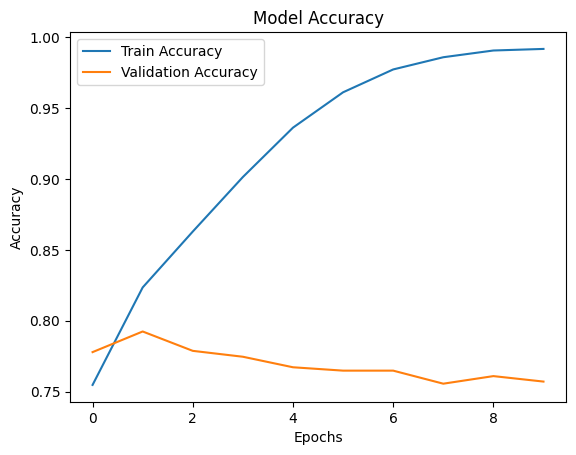

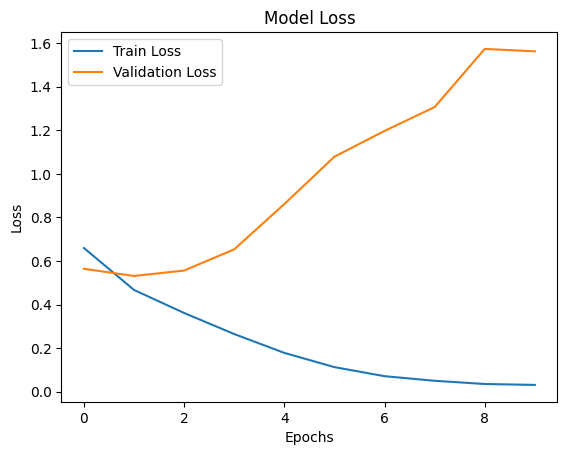

In [45]:
# Đánh giá mô hình trên tập test
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Vẽ biểu đồ accuracy và loss
import matplotlib.pyplot as plt

# Biểu đồ Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Biểu đồ Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
def predict_sentiments(reviews):
    # Tiền xử lý danh sách các đánh giá
    tokenized_texts = tokenizer.texts_to_sequences(reviews)
    padded_texts = pad_sequences(tokenized_texts, maxlen=max_len)
    
    # Dự đoán cảm xúc
    predictions = model.predict(padded_texts)
    
    label_map = {0: 'Tiêu cực', 1: 'Trung tính', 2: 'Tích cực'}
    predicted_labels = [label_map[np.argmax(pred)] for pred in predictions]
    
    return predicted_labels

new_reviews = [
    "hàng tốt , giao đúng màu , viền đổi màu siêu đẹp , mic cầm vừa tay nhg phải để gần mồm ms nói đc , mic đổi dc giọng , nhiều tính năng , nhỏ nhắn xinh xắn , màu hồng đẹp xinh dã man , shop hỗ trợ nhiệt tình , okk lắmm", #5sao
    "Tiền nào của đấy thôi ạ có hơn 100 nên sp phù hợp vs giá tiền nhé , mic để gần mồm mới thu đc", #4sao
    "Nghe nhạc thì lớn mà karaoke không ok cho lắm nhỏ xíu hát không hay", #3sao
    "Ko có âm thanh nt shop ko tl thỏa đáng, gọi điện chố gửi hàng ko bắt máy, TV ko nhiệt tình",#2sao
    "Mic cả 2 đều hát không được" #1sao
]

# Dự đoán cảm xúc cho danh sách các đánh giá
predicted_sentiments = predict_sentiments(new_reviews)

# Hiển thị kết quả
for review, sentiment in zip(new_reviews, predicted_sentiments):
    print(f"Review: {review}\nSentiment: {sentiment}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Review: hàng tốt , giao đúng màu , viền đổi màu siêu đẹp , mic cầm vừa tay nhg phải để gần mồm ms nói đc , mic đổi dc giọng , nhiều tính năng , nhỏ nhắn xinh xắn , màu hồng đẹp xinh dã man , shop hỗ trợ nhiệt tình , okk lắmm
Sentiment: Tích cực

Review: Tiền nào của đấy thôi ạ có hơn 100 nên sp phù hợp vs giá tiền nhé , mic để gần mồm mới thu đc
Sentiment: Tích cực

Review: Nghe nhạc thì lớn mà karaoke không ok cho lắm nhỏ xíu hát không hay
Sentiment: Tích cực

Review: Ko có âm thanh nt shop ko tl thỏa đáng, gọi điện chố gửi hàng ko bắt máy, TV ko nhiệt tình
Sentiment: Tiêu cực

Review: Mic cả 2 đều hát không được
Sentiment: Tích cực



# LSTM

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Chuẩn bị đầu vào và nhãn
X = data['tranform_data']
y = data['new_label']

# Tokenization và padding
max_words = 10000  # Số lượng từ tối đa
max_len = 200  # Chiều dài tối đa của chuỗi
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_tokenized = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_tokenized, maxlen=max_len)

# Mã hóa nhãn (Label encoding)
label_dict = {'Tích cực': 2, 'Trung tính': 1, 'Tiêu cực': 0}
y_encoded = y.map(label_dict)
y_categorical = to_categorical(y_encoded, num_classes=3)

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=42)


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Xây dựng mô hình LSTM
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, return_sequences=False))  # Dùng LSTM để xử lý chuỗi
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Phân loại 3 lớp: Tiêu cực, Trung tính, Tích cực

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Hiển thị mô hình
model.summary()

C:\Users\trant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 29s 129ms/step - accuracy: 0.7082 - loss: 0.7732 - val_accuracy: 0.7761 - val_loss: 0.5873
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 40s 123ms/step - accuracy: 0.8153 - loss: 0.5004 - val_accuracy: 0.7862 - val_loss: 0.5371
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 26s 125ms/step - accuracy: 0.8428 - loss: 0.4211 - val_accuracy: 0.7882 - val_loss: 0.5419
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 26s 124ms/step - accuracy: 0.8706 - loss: 0.3603 - val_accuracy: 0.7841 - val_loss: 0.6263
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 26s 122ms/step - accuracy: 0.8864 - loss: 0.3115 - val_accuracy: 0.7755 - val_loss: 0.5739
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 29s 138ms/step - accuracy: 0.8954 - loss: 0.2844 - val_accuracy: 0.7761 - val_loss: 0.6268
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 26s 124ms/step - accuracy: 0.9037 - loss: 0.2676 - val_accuracy: 0.7743 - val_loss: 0.6964
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 26s 124ms/step - accuracy: 0.9125 - loss: 0

106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7672 - loss: 0.7979
Test Accuracy: 76.15%


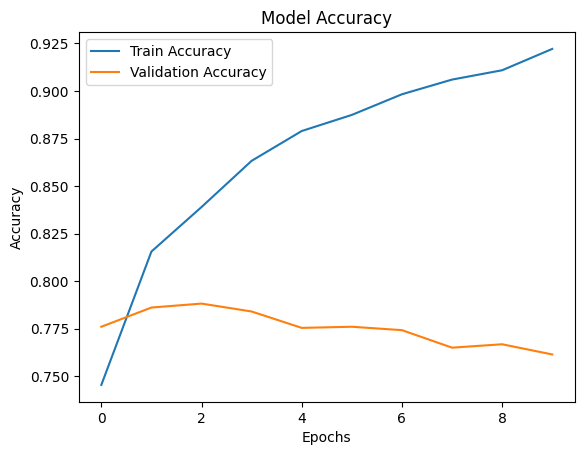

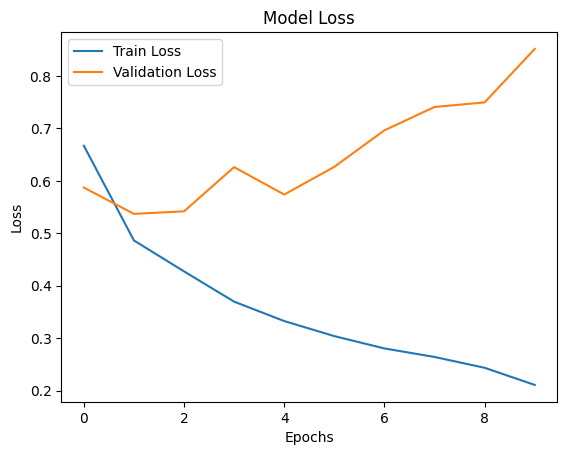

In [50]:
# Đánh giá mô hình trên tập test
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Vẽ biểu đồ accuracy và loss
import matplotlib.pyplot as plt

# Biểu đồ Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Biểu đồ Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
def predict_sentiments_lstm(reviews):
    tokenized_texts = tokenizer.texts_to_sequences(reviews)
    padded_texts = pad_sequences(tokenized_texts, maxlen=max_len)
    
    predictions = model.predict(padded_texts)
    
    label_map = {0: 'Tiêu cực', 1: 'Trung tính', 2: 'Tích cực'}
    predicted_labels = [label_map[np.argmax(pred)] for pred in predictions]
    
    return predicted_labels

new_reviews = [
    "hàng tốt , giao đúng màu , viền đổi màu siêu đẹp , mic cầm vừa tay nhg phải để gần mồm ms nói đc , mic đổi dc giọng , nhiều tính năng , nhỏ nhắn xinh xắn , màu hồng đẹp xinh dã man , shop hỗ trợ nhiệt tình , okk lắmm", #5sao
    "Tiền nào của đấy thôi ạ có hơn 100 nên sp phù hợp vs giá tiền nhé , mic để gần mồm mới thu đc", #4sao
    "Nghe nhạc thì lớn mà karaoke không ok cho lắm nhỏ xíu hát không hay", #3sao
    "Ko có âm thanh nt shop ko tl thỏa đáng, gọi điện chố gửi hàng ko bắt máy, TV ko nhiệt tình",#2sao
    "Mic cả 2 đều hát không được" #1sao
]

predicted_sentiments = predict_sentiments_lstm(new_reviews)

for review, sentiment in zip(new_reviews, predicted_sentiments):
    print(f"Review: {review}\nSentiment: {sentiment}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Review: hàng tốt , giao đúng màu , viền đổi màu siêu đẹp , mic cầm vừa tay nhg phải để gần mồm ms nói đc , mic đổi dc giọng , nhiều tính năng , nhỏ nhắn xinh xắn , màu hồng đẹp xinh dã man , shop hỗ trợ nhiệt tình , okk lắmm
Sentiment: Tích cực

Review: Tiền nào của đấy thôi ạ có hơn 100 nên sp phù hợp vs giá tiền nhé , mic để gần mồm mới thu đc
Sentiment: Tích cực

Review: Nghe nhạc thì lớn mà karaoke không ok cho lắm nhỏ xíu hát không hay
Sentiment: Tích cực

Review: Ko có âm thanh nt shop ko tl thỏa đáng, gọi điện chố gửi hàng ko bắt máy, TV ko nhiệt tình
Sentiment: Tiêu cực

Review: Mic cả 2 đều hát không được
Sentiment: Tích cực



In [52]:
def predict_sentiments_lstm(reviews):
    # Chuyển văn bản thành các chuỗi số sử dụng tokenizer đã được huấn luyện
    tokenized_texts = tokenizer.texts_to_sequences(reviews)
    padded_texts = pad_sequences(tokenized_texts, maxlen=max_len)
    
    # Dự đoán kết quả
    predictions = model.predict(padded_texts)
    
    # Gán nhãn theo kết quả dự đoán
    label_map = {0: 'Tiêu cực', 1: 'Trung tính', 2: 'Tích cực'}
    predicted_labels = [label_map[np.argmax(pred)] for pred in predictions]
    
    return predicted_labels

# Nhận đầu vào từ người dùng
print("Chào mừng bạn đến với hệ thống phân tích cảm xúc!")
while True:
    user_input = input("Nhập nhận xét của bạn (hoặc gõ 'exit' để thoát): ")
    if user_input.lower() == 'exit':
        print("Cảm ơn bạn đã sử dụng hệ thống!")
        break
    
    # Gọi hàm dự đoán
    predictions = predict_sentiments_lstm([user_input])
    print(f"Cảm xúc dự đoán: {predictions[0]}")

Chào mừng bạn đến với hệ thống phân tích cảm xúc!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Cảm xúc dự đoán: Tích cực
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Cảm xúc dự đoán: Tích cực
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Cảm xúc dự đoán: Tích cực
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Cảm xúc dự đoán: Tiêu cực
Cảm ơn bạn đã sử dụng hệ thống!
